<a href="https://colab.research.google.com/github/faraj-momin/faraj-momin/blob/main/B1_217_Faraj_Momin_(SC_LAB_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/content/data.csv')

In [2]:
print(df.head())
print(df.describe())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


 **1. Single Variable Linear Regression**

In [4]:
X_single = df[['sqft_living']]
y_single = df['price']

In [5]:
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

model_single = LinearRegression()

model_single.fit(X_train_single, y_train_single)

y_pred_single = model_single.predict(X_test_single)

In [6]:
mse_single = mean_squared_error(y_test_single, y_pred_single)
print("Mean Squared Error (Single Variable):", mse_single)

rmse_single = np.sqrt(mse_single)
print("Root Mean Squared Error (Single Variable):", rmse_single)

r2_single = r2_score(y_test_single, y_pred_single)
print("R-squared (Single Variable):", r2_single)

Mean Squared Error (Single Variable): 990204087727.1417
Root Mean Squared Error (Single Variable): 995089.9897633087
R-squared (Single Variable): 0.029065410341410414


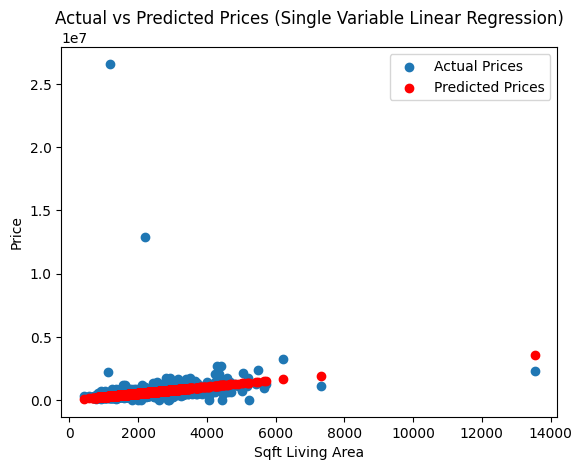

In [7]:
plt.scatter(X_test_single, y_test_single, label='Actual Prices')
plt.scatter(X_test_single, y_pred_single, color='red', label='Predicted Prices')
plt.xlabel("Sqft Living Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Single Variable Linear Regression)")
plt.legend()
plt.show()

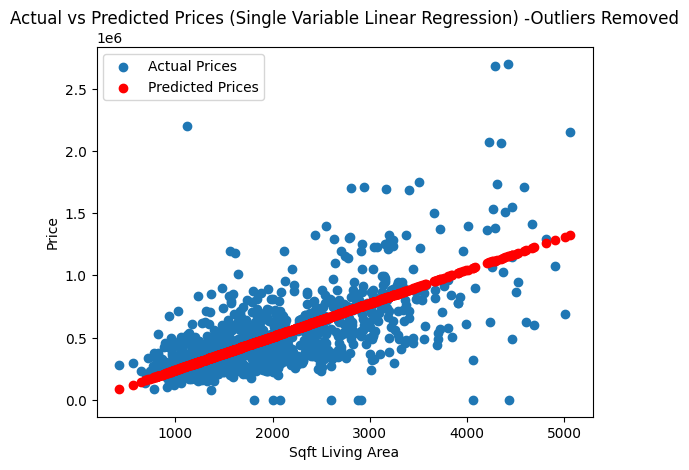

In [8]:
from scipy import stats

z_scores = np.abs(stats.zscore(np.column_stack((X_test_single, y_test_single))))
threshold = 3

# Remove outliers
filtered_data = (z_scores < threshold).all(axis=1)
X_test_single_no_outliers = X_test_single[filtered_data]
y_test_single_no_outliers = y_test_single[filtered_data]
y_pred_single_no_outliers = y_pred_single[filtered_data]

plt.scatter(X_test_single_no_outliers, y_test_single_no_outliers, label='Actual Prices')
plt.scatter(X_test_single_no_outliers, y_pred_single_no_outliers, color='red', label='Predicted Prices')
plt.xlabel("Sqft Living Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Single Variable Linear Regression) -Outliers Removed")
plt.legend()
plt.show()


**2. Multiple Variable Linear Regression**

In [9]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 986869414953.98
Root Mean Squared Error: 993413.013279965
R-squared: 0.03233518995632512


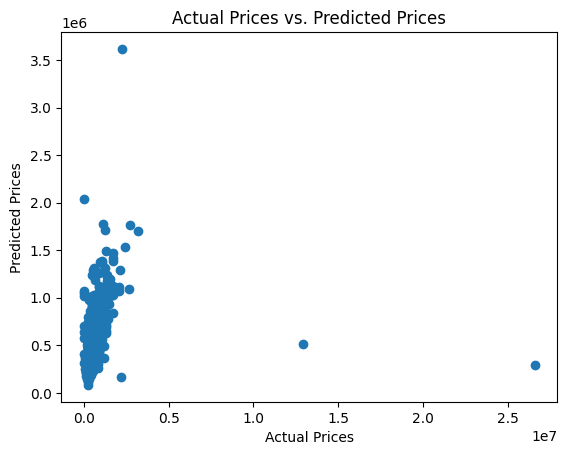

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

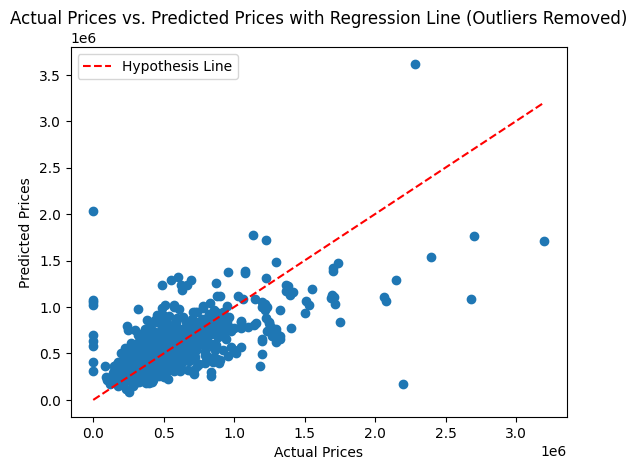

In [13]:
from scipy.stats import zscore
residuals = y_test - y_pred
z_scores = zscore(residuals)
threshold = 3

filtered_indices = np.where(np.abs(z_scores) < threshold)
y_test_filtered = y_test.iloc[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]

plt.scatter(y_test_filtered, y_pred_filtered)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], linestyle='--', color='red', label='Hypothesis Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices with Regression Line (Outliers Removed)")
plt.legend()
plt.show()


In [14]:
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 331038.9687692916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3. Polynomial


In [15]:
X_poly = df[['sqft_living']]
y_poly = df['price']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
X_test_poly_transformed = poly_features.transform(X_test_poly)


In [16]:

# Building the Polynomial Regression Model
model_poly = LinearRegression()

# Fitting the model on the training data for polynomial regression
model_poly.fit(X_train_poly_transformed, y_train_poly)

# Model Evaluation for polynomial regression
y_pred_poly = model_poly.predict(X_test_poly_transformed)

# Mean Squared Error for polynomial regression
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
print("Mean Squared Error (Polynomial):", mse_poly)

rmse_poly = np.sqrt(mse_poly)
print("Root Mean Squared Error (Polynomial):", rmse_poly)

# R-squared for polynomial regression
r2_poly = r2_score(y_test_poly, y_pred_poly)
print("R-squared (Polynomial):", r2_poly)


Mean Squared Error (Polynomial): 1021274115753.2391
Root Mean Squared Error (Polynomial): 1010581.0782679631
R-squared (Polynomial): -0.0013999909693873658


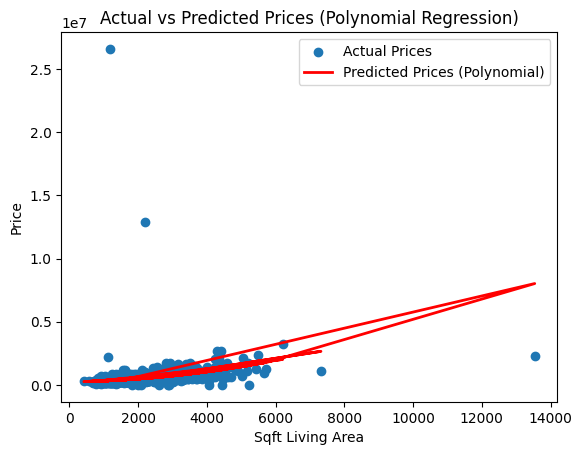

In [17]:
plt.scatter(X_test_poly, y_test_poly, label='Actual Prices', alpha=1)
plt.plot(X_test_poly.values, y_pred_poly, color='red', label='Predicted Prices (Polynomial)', linewidth=2)
plt.xlabel("Sqft Living Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Polynomial Regression)")
plt.legend()

plt.show()


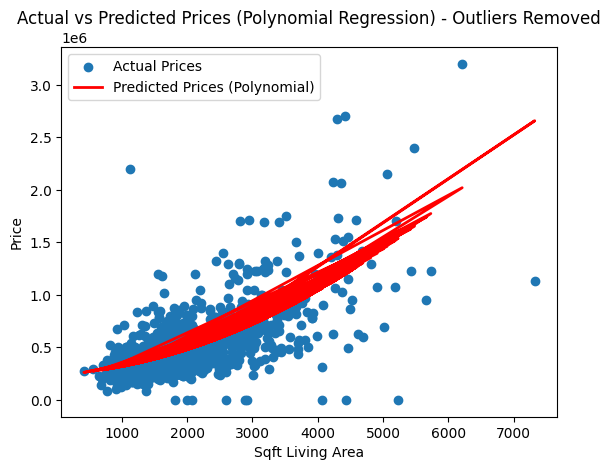

In [18]:
from scipy.stats import zscore
residuals_poly = y_test_poly - y_pred_poly
z_scores_poly = zscore(residuals_poly)


threshold_poly = 3

outlier_mask_poly = np.abs(z_scores_poly) < threshold_poly
X_test_poly_no_outliers = X_test_poly[outlier_mask_poly]
y_test_poly_no_outliers = y_test_poly[outlier_mask_poly]
y_pred_poly_no_outliers = y_pred_poly[outlier_mask_poly]

# Visualize actual vs predicted prices after removing outliers
plt.scatter(X_test_poly_no_outliers, y_test_poly_no_outliers, label='Actual Prices', alpha=1)
plt.plot(X_test_poly_no_outliers.values, y_pred_poly_no_outliers, color='red', label='Predicted Prices (Polynomial)', linewidth=2)
plt.xlabel("Sqft Living Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Polynomial Regression) - Outliers Removed")
plt.legend()
plt.show()
